In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%206/cbb.csv')
df.head()


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [12]:
df.shape

(1406, 24)

In [4]:
df['windex'] = np.where(df.WAB > 7, 'True', 'False')

In [5]:
df1 = df.loc[df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
df1.head()
df1['POSTSEASON'].value_counts()
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.11.26 |       h06a4308_0         138 KB  anaconda
    certifi-2020.6.20          |     pyhd3eb1b0_3         159 KB  anaconda
    openssl-1.1.1w             |       h7f8727e_0         3.8 MB  anaconda
    seaborn-0.12.2             |   py37h06a4308_0         487 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.6 MB

The following NEW packages will be INSTALLED:

  seaborn            anaconda/linux-64::seaborn-0.12.2-py37h06a4308_0 

The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2023.5.7~ --> anaconda::ca-c

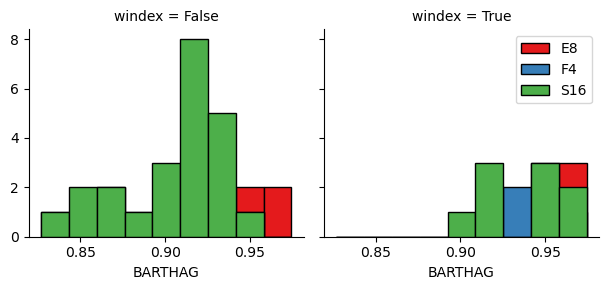

In [6]:
import seaborn as sns

bins = np.linspace(df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

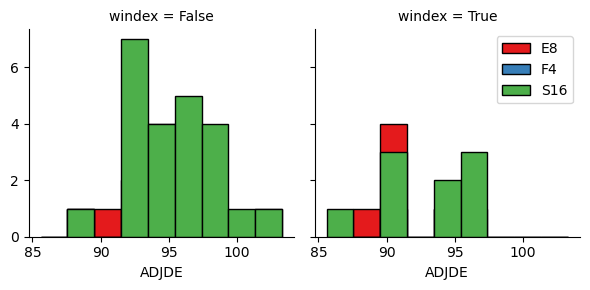

In [7]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [8]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
False   S16           0.605263
        E8            0.263158
        F4            0.131579
True    S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

In [9]:
df1['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
df1.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


In [10]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


In [11]:
y = df1['POSTSEASON'].values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

In [12]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

In [13]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation data: {accuracy:.2f}")

Accuracy on validation data: 0.67


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: di

In [3]:
# Import necessary libraries
from sklearn.datasets import load_iris  # Example dataset (replace with your dataset if needed)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = load_iris()
X = data.data       # Features
y = data.target     # Target variable

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of k values to test
k_values = range(1, 30)  # Test k from 1 to 29
accuracies = []

# Loop through each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Create KNN model with k neighbors
    knn.fit(X_train, y_train)                  # Train the model
    y_pred = knn.predict(X_val)                # Predict on validation data
    accuracy_temp = accuracy_score(y_val, y_pred)  # Calculate accuracy
    accuracies.append(accuracy_temp)           # Append accuracy to the list
    print(f"k = {k}, Accuracy: {accuracy_temp:.2f}")

# Find the k with the highest accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]  # Index of max accuracy
print(f"Optimal k: {optimal_k}")
print(f"Highest accuracy: {max(accuracies):.2f}")

k = 1, Accuracy: 1.00
k = 2, Accuracy: 1.00
k = 3, Accuracy: 1.00
k = 4, Accuracy: 1.00
k = 5, Accuracy: 1.00
k = 6, Accuracy: 1.00
k = 7, Accuracy: 0.97
k = 8, Accuracy: 1.00
k = 9, Accuracy: 1.00
k = 10, Accuracy: 1.00
k = 11, Accuracy: 1.00
k = 12, Accuracy: 1.00
k = 13, Accuracy: 1.00
k = 14, Accuracy: 1.00
k = 15, Accuracy: 1.00
k = 16, Accuracy: 1.00
k = 17, Accuracy: 1.00
k = 18, Accuracy: 1.00
k = 19, Accuracy: 1.00
k = 20, Accuracy: 1.00
k = 21, Accuracy: 1.00
k = 22, Accuracy: 1.00
k = 23, Accuracy: 1.00
k = 24, Accuracy: 1.00
k = 25, Accuracy: 1.00
k = 26, Accuracy: 1.00
k = 27, Accuracy: 1.00
k = 28, Accuracy: 1.00
k = 29, Accuracy: 1.00
Optimal k: 1
Highest accuracy: 1.00


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/datasets/base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Range of k values to test
k_values = range(1, 30)  # Test k from 1 to 20
accuracies = []

# Loop through each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy_temp = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy_temp)
    #print(accuracy_temp)
    print("k = " + str(k) + ", Accuracy: " + str(accuracy_temp))

# Find the k with the highest accuracy
optimal_k = k_values[accuracies.index(max(accuracies))]
print(f"Optimal k: {optimal_k}")
print(f"Highest accuracy: {max(accuracies):.2f}")

k = 1, Accuracy: 1.0
k = 2, Accuracy: 1.0
k = 3, Accuracy: 1.0
k = 4, Accuracy: 1.0
k = 5, Accuracy: 1.0
k = 6, Accuracy: 1.0
k = 7, Accuracy: 0.9666666666666667
k = 8, Accuracy: 1.0
k = 9, Accuracy: 1.0
k = 10, Accuracy: 1.0
k = 11, Accuracy: 1.0
k = 12, Accuracy: 1.0
k = 13, Accuracy: 1.0
k = 14, Accuracy: 1.0
k = 15, Accuracy: 1.0
k = 16, Accuracy: 1.0
k = 17, Accuracy: 1.0
k = 18, Accuracy: 1.0
k = 19, Accuracy: 1.0
k = 20, Accuracy: 1.0
k = 21, Accuracy: 1.0
k = 22, Accuracy: 1.0
k = 23, Accuracy: 1.0
k = 24, Accuracy: 1.0
k = 25, Accuracy: 1.0
k = 26, Accuracy: 1.0
k = 27, Accuracy: 1.0
k = 28, Accuracy: 1.0
k = 29, Accuracy: 1.0
Optimal k: 1
Highest accuracy: 1.00


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: di

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset (example dataset; replace with your own data)
data = load_iris()
X = data.data       # Features
y = data.target     # Target variable

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize the SVM classifier
svm_classifier = svm.SVC(kernel='rbf', C=10, gamma=0.1)  # Example kernel and parameters

# Fit the model on the training data
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the validation data
y_pred = svm_classifier.predict(X_val_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy of SVM classifier: {accuracy:.2f}")


Accuracy of SVM classifier: 1.00


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/datasets/base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/datasets/base.py:246: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Initialize the Logistic Regression model with C=0.01
logistic_model = LogisticRegression(C=0.01, solver='liblinear')  # 'liblinear' is suitable for small datasets

# Step 2: Train the model on the training data
logistic_model.fit(X_train, y_train)

# Step 3: Predict on the validation data
y_pred = logistic_model.predict(X_val)

# Step 4: Calculate and print the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.70


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(

In [6]:
y_pred = knn.predict(X_val)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


In [5]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation data: {accuracy:.2f}")

Accuracy on validation data: 1.00


In [12]:
from sklearn.metrics import f1_score, jaccard_score
# Calculate F1 Score for Logistic Regression
f1_logistic = f1_score(y_val, y_pred_logistic, average='weighted')  # Use 'weighted' for multi-class, or omit for binary
print(f"F1 Score (Logistic Regression): {f1_logistic:.2f}")

# Calculate Jaccard Similarity for Logistic Regression
jaccard_logistic = jaccard_score(y_val, y_pred_logistic, average='weighted')  # 'weighted' for multi-class
print(f"Jaccard Similarity (Logistic Regression): {jaccard_logistic:.2f}")


ImportError: cannot import name 'jaccard_score' from 'sklearn.metrics' (/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/metrics/__init__.py)